# **ANÁLISIS - Estadísiticas Criminales en México 2024**

### **Objetivo**

Ejercicio realizado para la formación como analista de datos. Se busca crear una conexión entre SQL, Python y finalmente Google Looker Studio.

### **Carga y Exploración de Datos**

**Previamente** limpié la tabla de excel que serían los datos de nuestra tabla que voy a analizar. He crado una base de datos en SQL Server Management y cree una única tabla desde la cuál voy a obtener la información que servirá para crear mi **DataFrame** aquí en Python.

- Instalo la librería que permite crear la conexión con el servidor local de SQL Server Management

In [1]:
pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


- Importo la librería correspondiente

In [2]:
import pyodbc

- Creo las credenciales para establecer la conexión entre Python y SQL

In [3]:
server = 'ULC-85LN2B3'  # Ej. 'LAPTOP123\\SQLEXPRESS'
database = 'Estadistica_crimenes_México'
username = 'SPT\danielortega'         # Si usas autenticación por usuario
password = 'tspt2016'      # Si aplica

# Si usas autenticación de Windows (más común en local)
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    f'SERVER={server};'
    f'DATABASE={database};'
    'Trusted_Connection=yes;'
)

# Crear cursor
cursor = conn.cursor()

# Probar con una consulta
cursor.execute("SELECT TOP 5 * FROM dbo.Crimenes")
filas = cursor.fetchall()

# Ver resultados
for fila in filas:
    print(fila)

# Cerrar conexión al final
conn.close()
          


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\danielortega\AppData\Local\Temp\ipykernel_17204\4200607893.py:3: SyntaxWarning: invalid escape sequence '\d'
  username = 'SPT\danielortega'         # Si usas autenticación por usuario


('La vida y la Integridad', 'Homicidio', 'Homicidio doloso', 'Nacional', 2049, 1944, 2062, 2259, 2279, 2265, 2182, 2074, 2209, 2192, 2049, 1885)
('La vida y la Integridad', 'Homicidio', 'Homicidio culposo', 'Nacional', 1376, 1365, 1583, 1488, 1740, 1490, 1415, 1395, 1338, 1424, 1467, 1602)
('La vida y la Integridad', 'Lesiones', 'Lesiones dolosas', 'Nacional', 12251, 12842, 14293, 14838, 17145, 14664, 13079, 12734, 13766, 13468, 13179, 12374)
('La vida y la Integridad', 'Lesiones', 'Lesiones culposas', 'Nacional', 4647, 4844, 4924, 4923, 5088, 4560, 4470, 4302, 4401, 4684, 4618, 4500)
('La vida y la Integridad', 'Feminicidio', 'Feminicidio', 'Nacional', 62, 62, 77, 64, 87, 67, 68, 60, 77, 73, 63, 60)


- Creo un **DataFrame** con la información que extraje desde SQL

In [4]:
import pandas as pd

server = 'ULC-85LN2B3'  # Ej. 'LAPTOP123\\SQLEXPRESS'
database = 'Estadistica_crimenes_México'
username = 'SPT\danielortega'         # Si usas autenticación por usuario
password = 'tspt2016'      # Si aplica

# Si usas autenticación de Windows (más común en local)
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    f'SERVER={server};'
    f'DATABASE={database};'
    'Trusted_Connection=yes;'
)

# Consulta SQL
query = "SELECT * FROM dbo.Crimenes"

# Ejecutar y cargar en DataFrame
df = pd.read_sql(query, conn)

# Mostrar las primeras filas para verificar
print(df.head())

# Cerrar conexión
conn.close()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\danielortega\AppData\Local\Temp\ipykernel_17204\221937870.py:5: SyntaxWarning: invalid escape sequence '\d'
  username = 'SPT\danielortega'         # Si usas autenticación por usuario


    Bien_jurídico_afectado  Tipo_Delito            Subtipo   Entidad    Enero  \
0  La vida y la Integridad    Homicidio   Homicidio doloso  Nacional   2049.0   
1  La vida y la Integridad    Homicidio  Homicidio culposo  Nacional   1376.0   
2  La vida y la Integridad     Lesiones   Lesiones dolosas  Nacional  12251.0   
3  La vida y la Integridad     Lesiones  Lesiones culposas  Nacional   4647.0   
4  La vida y la Integridad  Feminicidio        Feminicidio  Nacional     62.0   

   Febrero    Marzo    Abril     Mayo    Junio    Julio   Agosto  Septiembre  \
0   1944.0   2062.0   2259.0   2279.0   2265.0   2182.0   2074.0      2209.0   
1   1365.0   1583.0   1488.0   1740.0   1490.0   1415.0   1395.0      1338.0   
2  12842.0  14293.0  14838.0  17145.0  14664.0  13079.0  12734.0     13766.0   
3   4844.0   4924.0   4923.0   5088.0   4560.0   4470.0   4302.0      4401.0   
4     62.0     77.0     64.0     87.0     67.0     68.0     60.0        77.0   

   Octubre  Noviembre  Diciembre

C:\Users\danielortega\AppData\Local\Temp\ipykernel_17204\221937870.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


- Reviso el **DataFrame**

In [5]:
df.sample(10)

,Bien_jurídico_afectado,Tipo_Delito,Subtipo,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
42,La familia,Violencia familiar,Violencia familiar,Nacional,20818.0,21621.0,23943.0,25449.0,27509.0,24162.0,23875.0,23634.0,23612.0,23042.0,21587.0,19026.0
5,La vida y la Integridad,Aborto,Aborto,Nacional,83.0,64.0,48.0,64.0,75.0,62.0,63.0,65.0,60.0,55.0,74.0,71.0
1081,La libertad y la seguridad sexual,Violación equiparada,Violación equiparada,Nayarit,2.0,2.0,1.0,3.0,1.0,1.0,1.0,5.0,1.0,3.0,NaN,1.0
728,La libertad y la seguridad sexual,Incesto,Incesto,Guerrero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,Otros,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Colima,125.0,101.0,102.0,118.0,121.0,119.0,106.0,134.0,126.0,152.0,110.0,127.0
1212,El patrimonio,Robo total,Robo a negocio,Oaxaca,93.0,78.0,70.0,94.0,84.0,64.0,56.0,59.0,42.0,71.0,70.0,87.0
572,El patrimonio,Otros delitos contra el patrimonio,Otros delitos contra el patrimonio,CDMX,232.0,276.0,297.0,339.0,325.0,299.0,316.0,298.0,270.0,301.0,238.0,206.0
117,Otros,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Aguascalientes,287.0,405.0,413.0,371.0,404.0,351.0,408.0,387.0,360.0,364.0,365.0,338.0
140,El patrimonio,Robo total,Robo a casa habitación,Baja California,260.0,279.0,220.0,273.0,226.0,184.0,197.0,201.0,173.0,178.0,131.0,133.0
1906,La libertad y la seguridad sexual,Violación simple,Violación simple,Zacatecas,10.0,10.0,13.0,15.0,20.0,13.0,15.0,13.0,16.0,19.0,18.0,11.0


In [6]:
df.dtypes

Bien_jurídico_afectado     object
Tipo_Delito                object
Subtipo                    object
Entidad                    object
Enero                     float64
Febrero                   float64
Marzo                     float64
Abril                     float64
Mayo                      float64
Junio                     float64
Julio                     float64
Agosto                    float64
Septiembre                float64
Octubre                   float64
Noviembre                 float64
Diciembre                 float64
dtype: object

In [7]:
df.shape

(1947, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bien_jurídico_afectado  1947 non-null   object 
 1   Tipo_Delito             1947 non-null   object 
 2   Subtipo                 1947 non-null   object 
 3   Entidad                 1947 non-null   object 
 4   Enero                   1365 non-null   float64
 5   Febrero                 1373 non-null   float64
 6   Marzo                   1383 non-null   float64
 7   Abril                   1412 non-null   float64
 8   Mayo                    1399 non-null   float64
 9   Junio                   1382 non-null   float64
 10  Julio                   1365 non-null   float64
 11  Agosto                  1370 non-null   float64
 12  Septiembre              1372 non-null   float64
 13  Octubre                 1371 non-null   float64
 14  Noviembre               1370 non-null   

In [9]:
df.isnull().sum()
df.isnull().sum().sum()
print('Tenemos ', df.isnull().sum().sum(), 'valores nulos')

Tenemos  6848 valores nulos


### **Resumen de la exploración**

Después de revisar el **DataFrame** sé que tengo 16 columnas que van desde una clasificación general a una particular que son

- 'Bien_jurídico_afectado'
- 'Tipo_Delito'
- 'Subtipo'

Seguido de una columna de 'entidad' que corresponde a la entidad federativa en que se cometen los crímenes.
y después 12 columnas que corresponden a los meses del año.

Sé que tengo 1,947 filas. 

Sé que tengo datos nulos que debo reemplazar por ceros. 

También sé que el tipo de dato que se cargó en el **DataFrame** es correcto pues los números están como 'float64' y los textos como 'object'.

Por lo que prácticamente la única limpieza que voy a realizar es en los datos nulos. 


### **Limpieza de Datos**

Voy a reemplazar 'NaN' o Not a Number por 0 (cero)

In [10]:
df.fillna(0, inplace=True)

In [11]:
df.sample(10)

,Bien_jurídico_afectado,Tipo_Delito,Subtipo,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
38,El patrimonio,Extorsión,Extorsión,Nacional,851.0,875.0,801.0,936.0,874.0,812.0,818.0,855.0,853.0,895.0,880.0,790.0
233,Otros,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Baja California Sur,25.0,34.0,19.0,28.0,25.0,33.0,27.0,26.0,35.0,25.0,21.0,20.0
1524,Otros,Narcomenudeo,Narcomenudeo,Sinaloa,19.0,20.0,13.0,23.0,21.0,20.0,14.0,20.0,13.0,11.0,13.0,22.0
458,La familia,Otros delitos contra la familia,Otros delitos contra la familia,Chiapas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1942,Otros,Falsificación,Falsificación,Zacatecas,3.0,9.0,16.0,14.0,8.0,8.0,8.0,10.0,11.0,19.0,9.0,5.0
670,La libertad y la seguridad sexual,Otros delitos que atentan contra la libertad y...,Otros delitos que atentan contra la libertad y...,Guanajuato,0.0,4.0,4.0,3.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,3.0
1123,La vida y la Integridad,Lesiones,Lesiones dolosas,Nuevo León,332.0,430.0,404.0,619.0,564.0,463.0,513.0,444.0,549.0,513.0,373.0,292.0
1450,El patrimonio,Robo total,Robo de maquinaria,San Luis Potosí,2.0,6.0,5.0,0.0,2.0,6.0,3.0,4.0,6.0,2.0,7.0,8.0
344,Otros,Narcomenudeo,Narcomenudeo,Coahuila,584.0,854.0,655.0,782.0,696.0,723.0,790.0,1027.0,627.0,841.0,657.0,495.0
212,El patrimonio,Robo total,Otros robos,Baja California Sur,259.0,221.0,222.0,250.0,265.0,260.0,310.0,317.0,257.0,311.0,389.0,274.0


In [12]:
df[df['Enero'].isnull()]

,Bien_jurídico_afectado,Tipo_Delito,Subtipo,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre


Ya verifiqué mediante la función de sample y mediante la función de .isnull que no tengamos datos NaN.

Me di cuenta que necesitaba una columna con la suma de todos los meses

In [13]:
df['Total'] = df[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
df.sample(3)

,Bien_jurídico_afectado,Tipo_Delito,Subtipo,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
1356,Otros,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Queretaro,370.0,334.0,367.0,345.0,351.0,362.0,383.0,398.0,347.0,366.0,318.0,297.0,4238.0
1268,El patrimonio,Robo total,Robo en transporte público colectivo,Puebla,85.0,90.0,98.0,122.0,103.0,113.0,128.0,155.0,159.0,130.0,118.0,102.0,1403.0
1541,La libertad personal,Secuestro,Secuestro extorsivo,Sonora,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,2.0,10.0


### **Análisis Exploratorio**

Después de limpiar los datos de mi **DataFrame** puedo entonces empezar a explorar la información. Por ejemplo, totales, promedios, máximos, mínimos, etc. de cada mes y de cada delito.

In [14]:
df_long = df.melt(
    id_vars=['Bien_jurídico_afectado', 'Tipo_Delito', 'Subtipo', 'Entidad'],
    value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    var_name='Mes',
    value_name='Cantidad'
)

In [15]:
meses_es_en = {
    'Enero': 'January',
    'Febrero': 'February',
    'Marzo': 'March',
    'Abril': 'April',
    'Mayo': 'May',
    'Junio': 'June',
    'Julio': 'July',
    'Agosto': 'August',
    'Septiembre': 'September',
    'Octubre': 'October',
    'Noviembre': 'November',
    'Diciembre': 'December'
}

df_long['Mes_en'] = df_long['Mes'].map(meses_es_en)

df_long['Año'] = 2024  
df_long['Año-Mes'] = pd.to_datetime(df_long['Año'].astype(str) + '-' + df_long['Mes_en'], format='%Y-%B')

promedios = df_long.groupby(['Entidad', 'Año-Mes'])['Cantidad'].mean().reset_index()

### **Visualización**

Ya que la información tiene demasiadas variables, será más fácil analizarlo desde la visualización, comparando Categorías y subcategorías.

a) Número promedio de delitos agrupados por estado y mes de ocurrencia.

In [16]:
import plotly.express as px
fig = px.bar(
    promedios, 
    x='Año-Mes',
    y='Cantidad',
    color='Entidad',
    )
fig.show() 

b) El delito más común por municipio

> Respuesta: El delito más común es el Robo Total en Aguascalientes, Baja California y Baja California Sur

In [17]:
delito_mas_comun = df_long.groupby(['Entidad', 'Tipo_Delito'])['Cantidad'].sum().reset_index()
delito_mas_comun = delito_mas_comun.sort_values(['Entidad', 'Cantidad'], ascending=[True, False])
delito_top = delito_mas_comun.groupby('Entidad').first().reset_index()
delito_top.head(3)

,Entidad,Tipo_Delito,Cantidad
0,Aguascalientes,Robo total,10364.0
1,Baja California,Robo total,29441.0
2,Baja California Sur,Robo total,5606.0


<Axes: title={'center': 'Delito más común por entidad'}, xlabel='Entidad'>

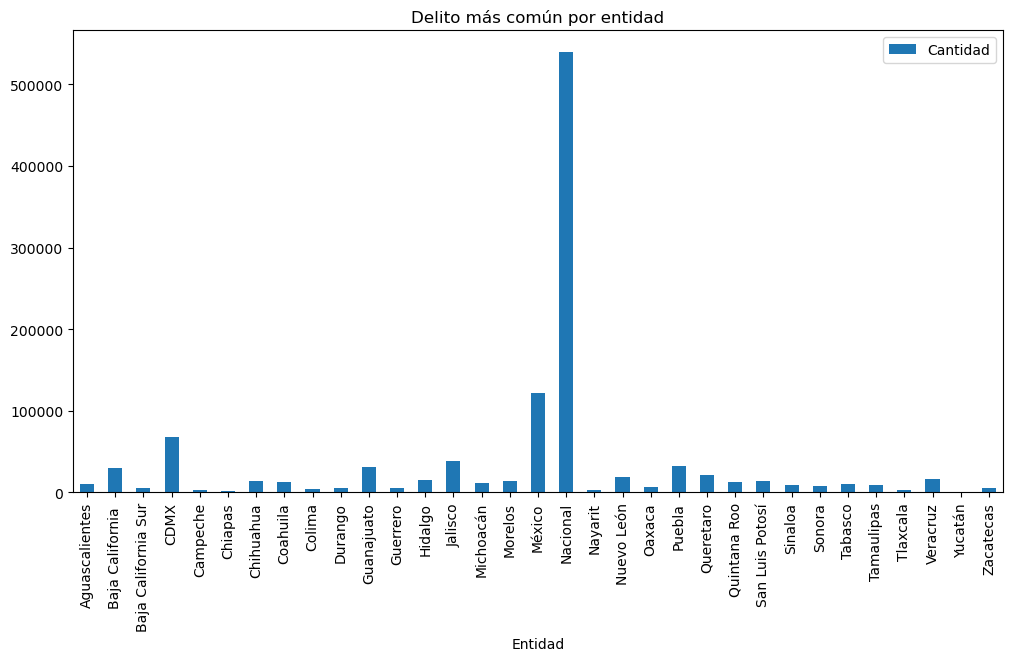

In [18]:
delito_top.plot(x='Entidad', y='Cantidad', kind='bar', figsize=(12, 6), title='Delito más común por entidad')

In [19]:
import plotly.express as px
fig = px.bar(
    delito_top, 
    x='Entidad',
    y='Cantidad',
    color='Tipo_Delito',
    )
fig.show()  

c) La temporada con más crímenes en México

Respuesta: Mayo es el més con mayor crímenes con 27,509 seguido de Abril y Octubre.

In [20]:
temporada = df_long.groupby('Mes')['Cantidad'].sum().sort_values(ascending=False)

fig = px.bar(
    temporada,
    x=temporada.index,
    y=temporada.values,
    title='Total de delitos por mes',
)
fig.show()

d) El número promedio de delitos agrupados por tipo de delito y año y mes en la ciudad de México ordenados de mayor a menor

In [21]:
cdmx = df_long[df_long['Entidad'].str.contains("CDMX", case=False)]

cdmx_grouped = cdmx.groupby(['Tipo_Delito', 'Año-Mes'])['Cantidad'].mean().reset_index()
cdmx_grouped = cdmx_grouped.sort_values('Cantidad', ascending=False)

fig = px.bar(
    cdmx_grouped,
    x='Tipo_Delito',
    y='Cantidad',
    color='Año-Mes',
    title='Delitos en CDMX por Tipo y Mes',
)
fig.show()

e) Un análisis propio que sea de tu interés.

In [22]:
top_bienes = df_long.groupby('Bien_jurídico_afectado')['Cantidad'].sum().sort_values(ascending=False)

fig = px.bar(
    top_bienes,
    x=top_bienes.index,
    y=top_bienes.values,
    title='Bien Jurídico Afectado con más Delitos',
)
fig.show()

### **Exportación del archivo en CSV para cargar en Google Data Looker**

In [23]:
df_long.to_csv('crimenes_mexico_long.csv', index=False)